In [1]:
import os
import json
import shutil
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import random, math

In [2]:
csv_files = glob('data/sites/csv/**/*.csv', recursive=True)
sorted_csv_files = sorted(csv_files, key=lambda x: x.split('/')[-1])
initialiser, remainder = sorted_csv_files[0], sorted_csv_files[1:]
df = pd.read_csv(initialiser, encoding="ISO-8859-1")
for file in remainder:
    site = pd.read_csv(file, encoding="ISO-8859-1")
    df = pd.concat([df, site])
df['subdir_video'] = df.subfolder.astype(str) + '_' + df.video_file_name.astype(str)

**Basic analysis**

In [3]:
df.columns

Index(['new_row_id', 'country', 'research_site', 'genus', 'species',
       'cam_coverage_area', 'location_metadata', 'habitat', 'utm_zone',
       'utm_long', 'utm_lat', 'cam_id', 'vid_res', 'vid_duration',
       'panaf_datasheet_comments', 'year', 'month', 'day', 'time_hr',
       'time_min', 'cell_id', 'subfolder', 'video_file_name', 'event_id',
       'min_number_chimps_per_video', 'max_number_chimps_per_video',
       'age_class', 'sex', 'tool_use', 'vocalization', 'bipedal',
       'camera_reaction', 'behavioral_context', 'other_species',
       'additional_comments', 'record_type', 'subdir_video'],
      dtype='object')

In [4]:
# Genus and species
df.genus.value_counts()
df.species.value_counts()

troglodytes verus             29823
troglodytes troglodytes       10159
troglodytes schweinfurthii     8516
troglodytes ellioti            2163
Name: species, dtype: int64

In [5]:
# Location and habitat
df.habitat.value_counts()
df.location_metadata.value_counts()

trail                          17265
termite site                    8890
water source                    5264
fruit tree                      2439
water source / feeding site     2219
                               ...  
natural bridge/trail               2
trail / ravine                     1
fruit tree / rock                  1
clearing / termite site            1
tree / liana                       1
Name: location_metadata, Length: 114, dtype: int64

In [7]:
# What is this?
df.event_id.value_counts()

412.0     489
559.0     402
848.0     394
32.0      389
284.0     315
         ... 
5148.0      1
905.0       1
908.0       1
5024.0      1
5283.0      1
Name: event_id, Length: 1217, dtype: int64

In [8]:
df.age_class.value_counts()

adult             27781
juvenile           9189
infant             8166
adolescent         3778
unidentifiable     1545
unclear              14
Name: age_class, dtype: int64

In [9]:
df.sex.value_counts()

male              19247
female            17581
unclear           12201
unidentifiable     1444
Name: sex, dtype: int64

**Get entry counts for each country**

In [23]:
df[df.behavioral_context=='travel'].additional_comments.value_counts()

dorsal infant                                                     885
ventral infant                                                    458
carrying young dorsally                                           245
carried                                                           187
same individual from last video                                   147
                                                                 ... 
injured in the right hand                                           1
aside the adolescent (partially visible in background)              1
dorsal infant; seems male                                           1
possibly male; only partially visible in first second of video      1
walks past in last second of video; not fully visible               1
Name: additional_comments, Length: 4509, dtype: int64

In [12]:
df.additional_comments.value_counts()[:50]

same individual from last video                                                      2717
dorsal infant                                                                        1182
ventral infant                                                                        919
using tool for eating termites                                                        421
carrying young dorsally                                                               313
drinking water                                                                        303
using stick as tool for eating termites                                               260
carried                                                                               245
being carried                                                                         212
carrying young ventrally                                                              172
algae fishing                                                                         171
paired-cam

In [19]:
from glob import glob
local = [x.split('.')[0].split('/')[-1].lower() for x in glob('/home/dl18206/Desktop/phd/data/panaf/machine_annotations/videos/tracked/drc/bili/**/*.mp4', recursive=True)]

In [ ]:
df[(df.max_number_chimps_per_video==1) & (df.behavioral_context=='travel')].additional_comments.unique()

In [67]:
df[(df.max_number_chimps_per_video==1)].behavioral_context.value_counts()

travel                     3125
tool use termites          1848
feeding                     944
resting                     563
tool use                    546
unclear                     473
tool use unknown            371
climbing                    343
camera reaction             274
displaying                  112
tool use ants                86
tool use nuts                77
tool use stone throwing      66
tool use algae               56
playing                       4
aggression                    4
grooming                      2
greeting                      1
displaying                    1
no                            1
Name: behavioral_context, dtype: int64

In [56]:
dict(
    behaviours=dict(
        travel=3125,
        tool_use=dict(
            tool_use=546,
            termite=1848,
            unknown=371,
            ants=86,
            nuts=77,
            stone_throwing=66,
            algae=56,
        ),
        feeding=944,
        resting=563,
        climbing=343,
        camera_reaction=274,
        displaying=112,
    )
)

{'behaviours': {'travel': 3125,
  'tool_use': {'tool_use': 546,
   'termite': 1848,
   'unknown': 371,
   'ants': 86,
   'nuts': 77,
   'stone_throwing': 66,
   'algae': 56}}}

In [ ]:
df[(df.max_number_chimps_per_video==1) & (df.camera_reaction=='yes')].additional_comments.unique()

In [10]:
df[(df.country=='guinea')&(df.research_site=='sobory')].head()

,new_row_id,country,research_site,genus,species,cam_coverage_area,location_metadata,habitat,utm_zone,utm_long,...,sex,tool_use,vocalization,bipedal,camera_reaction,behavioral_context,other_species,additional_comments,record_type,subdir_video
0,1,guinea,sobory,Pan,troglodytes verus,86.33,trail,gallery forest,29n,254649.0,...,unclear,no,no,no,no,travel,NaN,NaN,60s_video,sob_vid01_0254649_1309636_20160524_ek000117
1,2,guinea,sobory,Pan,troglodytes verus,86.33,trail,gallery forest,29n,254649.0,...,male,no,no,no,yes,resting,NaN,NaN,60s_video,sob_vid01_0254649_1309636_20160622_ek000010
2,3,guinea,sobory,Pan,troglodytes verus,86.33,trail,gallery forest,29n,254649.0,...,male,no,no,no,yes,resting,NaN,NaN,60s_video,sob_vid01_0254649_1309636_20160622_ek000023
3,4,guinea,sobory,Pan,troglodytes verus,86.33,trail,gallery forest,29n,254649.0,...,female,no,no,no,yes,resting,NaN,NaN,60s_video,sob_vid01_0254649_1309636_20160622_ek000023
4,5,guinea,sobory,Pan,troglodytes verus,86.33,trail,gallery forest,29n,254649.0,...,unclear,no,no,no,yes,resting,NaN,dorsal infant,60s_video,sob_vid01_0254649_1309636_20160622_ek000023


**Cross referencing annotations**

In [38]:
annotations = open('annotations.txt', 'r').read().splitlines()
videos = list(df.subdir_video.unique())

In [70]:
from tqdm import tqdm
match = [x for x in tqdm(annotations) if x in videos]
m_df = df[df.subdir_video.isin(match)]
m_df.head()

100%|██████████| 10752/10752 [00:08<00:00, 1333.73it/s]


,new_row_id,country,research_site,genus,species,cam_coverage_area,location_metadata,habitat,utm_zone,utm_long,...,sex,tool_use,vocalization,bipedal,camera_reaction,behavioral_context,other_species,additional_comments,record_type,subdir_video
0,1,mali,bafing,Pan,troglodytes verus,9.87,trail,forest on rock,29n,342661.0,...,male,no,no,no,no,travel,NaN,Not very clear screen,60s_video,baf_vid1_0342661_1432807_20141103_11160014
5,6,mali,bafing,Pan,troglodytes verus,14.00,feeding site/fruit tree,gallery forest,29n,346467.0,...,male,no,no,no,yes,feeding,NaN,"Near the camera, with a fruit in his mouth",60s_video,baf_vid10_0346467_1436892_20151112_11280025
10,11,mali,bafing,Pan,troglodytes verus,7.00,water source,forest on rock,29n,343264.0,...,female,no,no,no,no,resting,NaN,Carries an infant ventrally,60s_video,baf_vid11_0343264_1434832_20151019_12100066
11,12,mali,bafing,Pan,troglodytes verus,7.00,water source,forest on rock,29n,343264.0,...,unclear,no,no,no,no,resting,NaN,Rides ventrally on the above chimp,60s_video,baf_vid11_0343264_1434832_20151019_12100066
12,13,mali,bafing,Pan,troglodytes verus,7.00,water source,forest on rock,29n,343264.0,...,female,no,yes,no,yes,resting,NaN,At the top right side of the screen. Seems to ...,60s_video,baf_vid11_0343264_1434832_20151019_12100066


**Build annotation file for Boe site**

In [ ]:
# Filter by only guineabissau, boe and single-chimp videos
boe = df[(df.country=='guineabissau') & (df.research_site=='boe') & (df.max_number_chimps_per_video==1)]

# Confirm there are only unique labels for each video
assert len(boe) == len(boe.subdir_video.unique())

# Print distribution of beahioural contexts
print(boe.behavioral_context.value_counts())

# Create index labels for training
boe['label'] = boe.behavioral_context.astype('category').cat.codes.astype('int')

# Create train-test splits for Boe site

from sklearn.model_selection import train_test_split
train, test = train_test_split(boe, test_size=0.4)
train['split'] = 'train'
test['split'] = 'test'
boe = pd.concat([train, test])

# export as csv
boe.to_csv('guineabissau_boe_labels.csv')

In [130]:
len(boe.label.unique())

9

In [39]:
df[(df.max_number_chimps_per_video==1)&(df.behavioral_context=='camera reaction')].head()

,new_row_id,country,research_site,genus,species,cam_coverage_area,location_metadata,habitat,utm_zone,utm_long,...,sex,tool_use,vocalization,bipedal,camera_reaction,behavioral_context,other_species,additional_comments,record_type,subdir_video
60,61,mali,bafing,Pan,troglodytes verus,11.93,water source,gallery forest,29n,345506.0,...,unclear,no,no,no,yes,camera reaction,NaN,"Can not see nothing, just its back and a bit o...",60s_video,baf_vid13_0345506_1436561_20150216/2170022
306,307,mali,bafing,Pan,troglodytes verus,10.50,nesting site/trail,forest on rock,29n,345381.0,...,female,no,no,no,yes,camera reaction,NaN,NaN,60s_video,baf_vid22_0345381_1438099_20151023/10250005
443,444,mali,bafing,Pan,troglodytes verus,15.30,nesting site,forest on rock,29n,345509.0,...,unclear,no,no,no,yes,camera reaction,NaN,Investigates the camera,60s_video,baf_vid24_0345509_1436557_20160303/3070026
451,452,mali,bafing,Pan,troglodytes verus,12.24,nesting site,forest on rock,29n,345509.0,...,unclear,no,no,no,yes,camera reaction,NaN,camera inspection,60s_video,baf_vid24a_0345509_1436557_20151112/11160028
454,455,mali,bafing,Pan,troglodytes verus,12.24,nesting site,forest on rock,29n,345509.0,...,unclear,no,no,no,yes,camera reaction,NaN,camera inspection,60s_video,baf_vid24a_0345509_1436557_20151112/12220265


In [136]:
df.behavioral_context.value_counts().sort_values()

no                            1
greeting                      1
displaying                    1
grooming                      2
aggression                    4
playing                       4
tool use algae               56
tool use stone throwing      62
tool use nuts                77
tool use ants                86
displaying                  103
camera reaction             258
climbing                    337
tool use unknown            371
unclear                     458
tool use                    546
resting                     551
feeding                     939
tool use termites          1848
travel                     3031
Name: behavioral_context, dtype: int64

<AxesSubplot:>

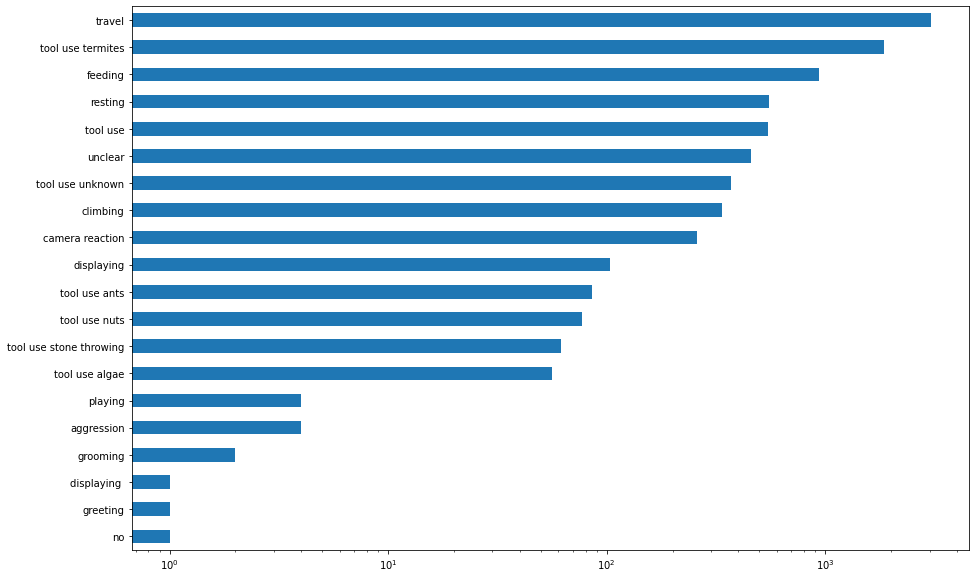

In [130]:
plt.figure(figsize=(15,10))
df.behavioral_context.value_counts().sort_values().plot(kind ='barh', logx=True)

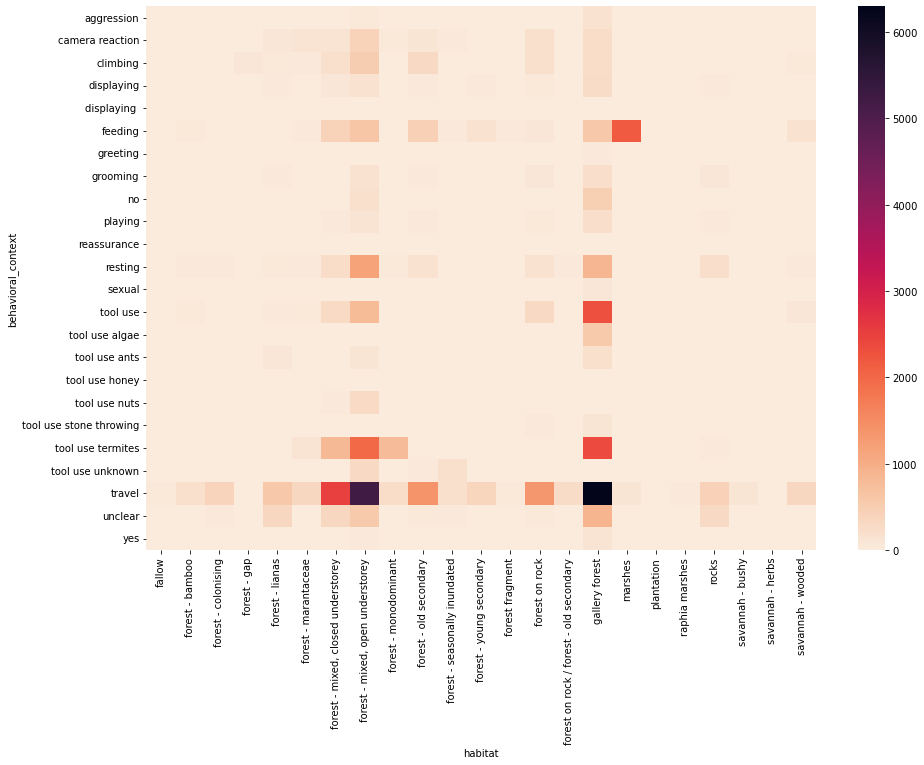

In [120]:
# Co occurence
co_matrix = pd.crosstab(df.behavioral_context, df.habitat)
plt.figure(figsize=(15,10))
sns.heatmap(co_matrix, cmap=sns.cm.rocket_r);

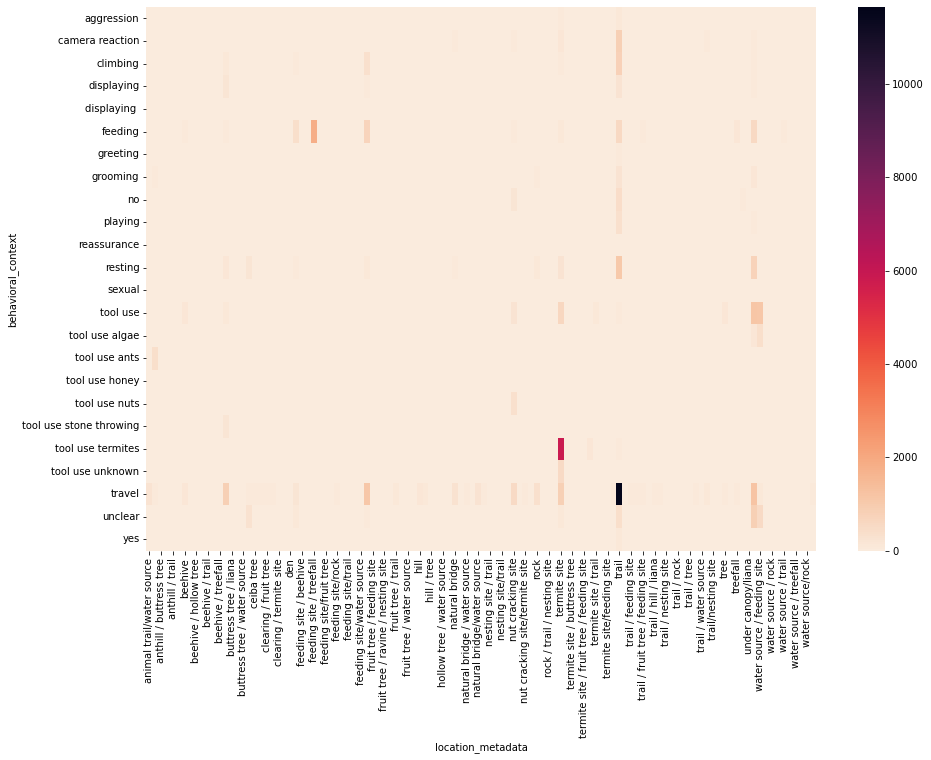

In [121]:
# Co occurence
co_matrix = pd.crosstab(df.behavioral_context, df.location_metadata)
plt.figure(figsize=(15,10))
sns.heatmap(co_matrix, cmap=sns.cm.rocket_r);